# HAY ESPACIOS EN EL DATASET DE EXTRADATA

In [ ]:
# First, we need to download an auxiliary Python file for STAN
!wget http://mlsm.man.dtu.dk/mbml/pystan_utils.py

--2021-05-09 16:52:32--  http://mlsm.man.dtu.dk/mbml/pystan_utils.py
Resolving mlsm.man.dtu.dk (mlsm.man.dtu.dk)... 192.38.87.226
Connecting to mlsm.man.dtu.dk (mlsm.man.dtu.dk)|192.38.87.226|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2661 (2.6K) [text/x-python]
Saving to: ‘pystan_utils.py.1’

pystan_utils.py.1   100%[===================>]   2.60K  --.-KB/s    in 0s      

2021-05-09 16:52:33 (387 MB/s) - ‘pystan_utils.py.1’ saved [2661/2661]



In [ ]:
!ls

country_profile_variables.csv  __pycache__	pystan_utils.py.1
country_vaccinations.csv       pystan_utils.py	sample_data


In [ ]:
#data analysis libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
import pystan_utils
import pystan



In [ ]:

# fix random generator seed (for reproducibility of results)
np.random.seed(42)

# matplotlib options
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving country_profile_variables.csv to country_profile_variables (1).csv
Saving country_vaccinations.csv to country_vaccinations (1).csv


In [ ]:
CovidData = pd.read_csv("country_vaccinations.csv")
ExtraData2 = pd.read_csv("country_profile_variables.csv")

In [ ]:
CovidData.fillna(0, inplace=True)
ExtraData2.fillna(0, inplace=True)

In [ ]:
CovidData.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
5,Afghanistan,AFG,2021-02-27,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
7,Afghanistan,AFG,2021-03-01,0.0,0.0,0.0,0.0,1580.0,0.00,0.00,0.0,41.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
8,Afghanistan,AFG,2021-03-02,0.0,0.0,0.0,0.0,1794.0,0.00,0.00,0.0,46.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
9,Afghanistan,AFG,2021-03-03,0.0,0.0,0.0,0.0,2008.0,0.00,0.00,0.0,52.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


# Second extra dataset

The aim of the next section of code is assure that it exists a connexion between Covid Dataset and an extra dataset with additional info. Datasets will be connected by the attribute "country". However, some cleaning is neaded to make them match (both country names have to be exactly equal in both datasets)

In [ ]:
ExtraData2.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,61.6,10.0,28.5,8.6,19.3/83.6,125,125,1458,3568,-2110,-5121,3.2,26.7,4.0,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,41.4,18.3,40.3,15.8,40.2/61.0,134,134,1962,4669,-2707,-1222,-0.1,57.4,2.2,1.7,79.9/75.6,17.4/19.0,57.6/2.0,8.8,14.6,5.9,1.3,3.5,111.7/115.5,92.5/98.8,68.1/48.7,22.9,106.4,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,50.5,10.8,34.5,54.7,11.4,17.0/70.7,160,161,29992,47091,-17099,-27229,2.0,70.7,2.8,3.0,76.5/74.1,29.3/9.4,242.4/0.6,99.8,27.7,7.2,...,...,112.7/119.5,101.7/98.1,45.1/28.9,31.6,113.0,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,-99.0,-99.0,...,...,...,...,.../...,112,112,-99,-99,-99,-99,-~0.0,87.2,-0.1,2.6,77.8/71.1,33.3/9.0,23.2/41.8,-99,9.6,-99.0,-99,-99,-99,-99,-99,-99.0,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,88.6,-99,-99,-99,-99,-99,-99,-99,100,1355,-1255,-99,-1.6,85.1,0.1,1.2,-99,14.4/19.0,42.1/59.7,-99,-99,8.1,3.7,3.3,-99,-99,-99,32.1,88.1,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [ ]:
def make_countries_list():
    country_CovidData = list(CovidData['country'].unique())
    country_ExtraData = list(ExtraData2['country'].unique())
    print(str(len(country_CovidData))+ " Countries in CovidData\n" + str(len(country_ExtraData)) + " Countries in ExtraData2")
    return country_CovidData,country_ExtraData

In [ ]:
def replace_countries(Countries_not_match,Countries_to_replace):
    for i in range(len(Countries_not_match)):
        ExtraData2.replace(Countries_not_match[i],Countries_to_replace[i],inplace=True)

In [ ]:
#function which shows which countries are already correct and which ones need changes

def check_countries(CovidData_Countries,ExtraData_Countries):
    count = 0
    countries_ok = []
    countries_not_ok = []
    for i in CovidData_Countries:
        if i in ExtraData_Countries:
            count += 1
            countries_ok.append(i)
        else:
            countries_not_ok.append(i)
    print(str(len(countries_ok)) + " number of countries that match\n" + str(len(countries_not_ok)) + 
         " number of countries that don´t match\n")
    print("Countries that don´t match are:\n" + str(countries_not_ok))
    return countries_ok, countries_not_ok

In [ ]:
#Function that returns the list of countries that will replace the ones that don´t match in ExtraData eliminating the
#ones we just dropped

def drop_from_list(todrop, listorigin):
    for element in todrop:
        if element in listorigin:
            listorigin.remove(element)
    print(listorigin)
    return listorigin

In [ ]:
CovidData_Countries, ExtraData_Countries = make_countries_list()

166 Countries in CovidData
229 Countries in ExtraData2


In [ ]:
countries_ok,countries_not_ok = check_countries(CovidData_Countries,ExtraData_Countries)

139 number of countries that match
27 number of countries that don´t match

Countries that don´t match are:
['Bolivia', 'Brunei', 'Cape Verde', "Cote d'Ivoire", 'England', 'Faeroe Islands', 'Falkland Islands', 'Guernsey', 'Hong Kong', 'Iran', 'Jersey', 'Kosovo', 'Laos', 'Macao', 'Moldova', 'North Macedonia', 'Northern Cyprus', 'Northern Ireland', 'Palestine', 'Russia', 'Scotland', 'South Korea', 'Taiwan', 'United States', 'Venezuela', 'Vietnam', 'Wales']


In [ ]:
print(ExtraData2["country"].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Falkland Islands (Malvinas)'
 'Faroe Islands'

In [ ]:
#Country names that have to be change in ExtraData dataset so they fit country names in CovidData

Countries_not_match = ['Bolivia (Plurinational State of)','Brunei Darussalam','Cabo Verde','Faroe Islands',
                      'Iran (Islamic Republic of)',"Lao People's Democratic Republic", 'Cyprus', 'State of Palestine'
                      'Russian Federation','Republic of Korea','United States of America',
                      'Venezuela (Bolivarian Republic of)', 'Viet Nam']

#Countries that will be dropped in Covid Dataset because they don´t exist in ExtraData
Countries_not_ex = ["Cote d'Ivoire", 'England', 'Falkland Islands', 'Guernsey', 'Hong Kong', 'Jersey', 'Kosovo','Macao'
                   ,'Moldova','North Macedonia', 'Northern Ireland', 'Scotland', 'Taiwan','Wales']

In [ ]:
print(len(CovidData))
CovidData = CovidData[~CovidData.country.isin(Countries_not_ex)]
print(len(CovidData))

9576
8730


In [ ]:
 Countries_to_replace = drop_from_list(Countries_not_ex,countries_not_ok)

['Bolivia', 'Brunei', 'Cape Verde', 'Faeroe Islands', 'Iran', 'Laos', 'Northern Cyprus', 'Palestine', 'Russia', 'South Korea', 'United States', 'Venezuela', 'Vietnam']


In [ ]:
replace_countries(Countries_not_match,Countries_to_replace)

In [ ]:
CovidData_Countries, ExtraData_Countries = make_countries_list()

152 Countries in CovidData
229 Countries in ExtraData2


In [ ]:
countries_ok,countries_not_ok = check_countries(CovidData_Countries,ExtraData_Countries)

149 number of countries that match
3 number of countries that don´t match

Countries that don´t match are:
['Cyprus', 'Palestine', 'Vietnam']


In [ ]:
type(countries_not_ok)

list

In [ ]:
print(len(CovidData))
CovidData = CovidData[~CovidData.country.isin(countries_not_ok)]
print(len(CovidData))

8730
8623


In [ ]:
CovidData_Countries, ExtraData_Countries = make_countries_list()

149 Countries in CovidData
229 Countries in ExtraData2


In [ ]:
countries_ok,countries_not_ok = check_countries(CovidData_Countries,ExtraData_Countries)

149 number of countries that match
0 number of countries that don´t match

Countries that don´t match are:
[]


# CLUSTERING


The ExtraData2 dataset contains many attributes that are not of special interest for the prediction, and so they are not taken into account for the clustering. With this in mind, only the columns that are later going to be used for the predictions are used for the clusters.

In [ ]:
clust_cols = ['country', 'GDP: Gross domestic product (million current US$)', 'Population in thousands (2017)',
 'GDP per capita (current US$)', 'Health: Total expenditure (% of GDP)', 'Population age distribution (0-14 / 60+ years, %)']
#We want to generate the clusters out of the dataset we will use for the Final Prediction. Out of these columns, the ones that are
df_clust = ExtraData2[clust_cols]
df_clust["population"] = df_clust["Population in thousands (2017)"] * 1000
df_clust[['children %','3rd Age %']] = df_clust['Population age distribution (0-14 / 60+ years, %)'].str.split('/',expand=True)
df_clust['children %'] = pd.to_numeric(df_clust['children %'], downcast='float', errors='coerce') /100
df_clust['3rd Age %'] = pd.to_numeric(df_clust['3rd Age %'], downcast='float', errors='coerce') /100
df_clust.drop(["Population in thousands (2017)", 'Population age distribution (0-14 / 60+ years, %)'], axis = 1, inplace = True)
df_clust.head()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,country,GDP: Gross domestic product (million current US$),GDP per capita (current US$),Health: Total expenditure (% of GDP),population,children %,3rd Age %
0,Afghanistan,20270,623.2,8.2,35530000,0.432,0.041
1,Albania,11541,3984.2,5.9,2930000,0.174,0.190
2,Algeria,164779,4154.1,7.2,41318000,0.293,0.094
3,American Samoa,-99,-99.0,-99.0,56000,0.333,0.090
4,Andorra,2812,39896.4,8.1,77000,0.144,0.190


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
K=5
k=KMeans(n_clusters=5)

To have a better understanding of how these features of the countries are associated, let's take a look at the correlation matrix:

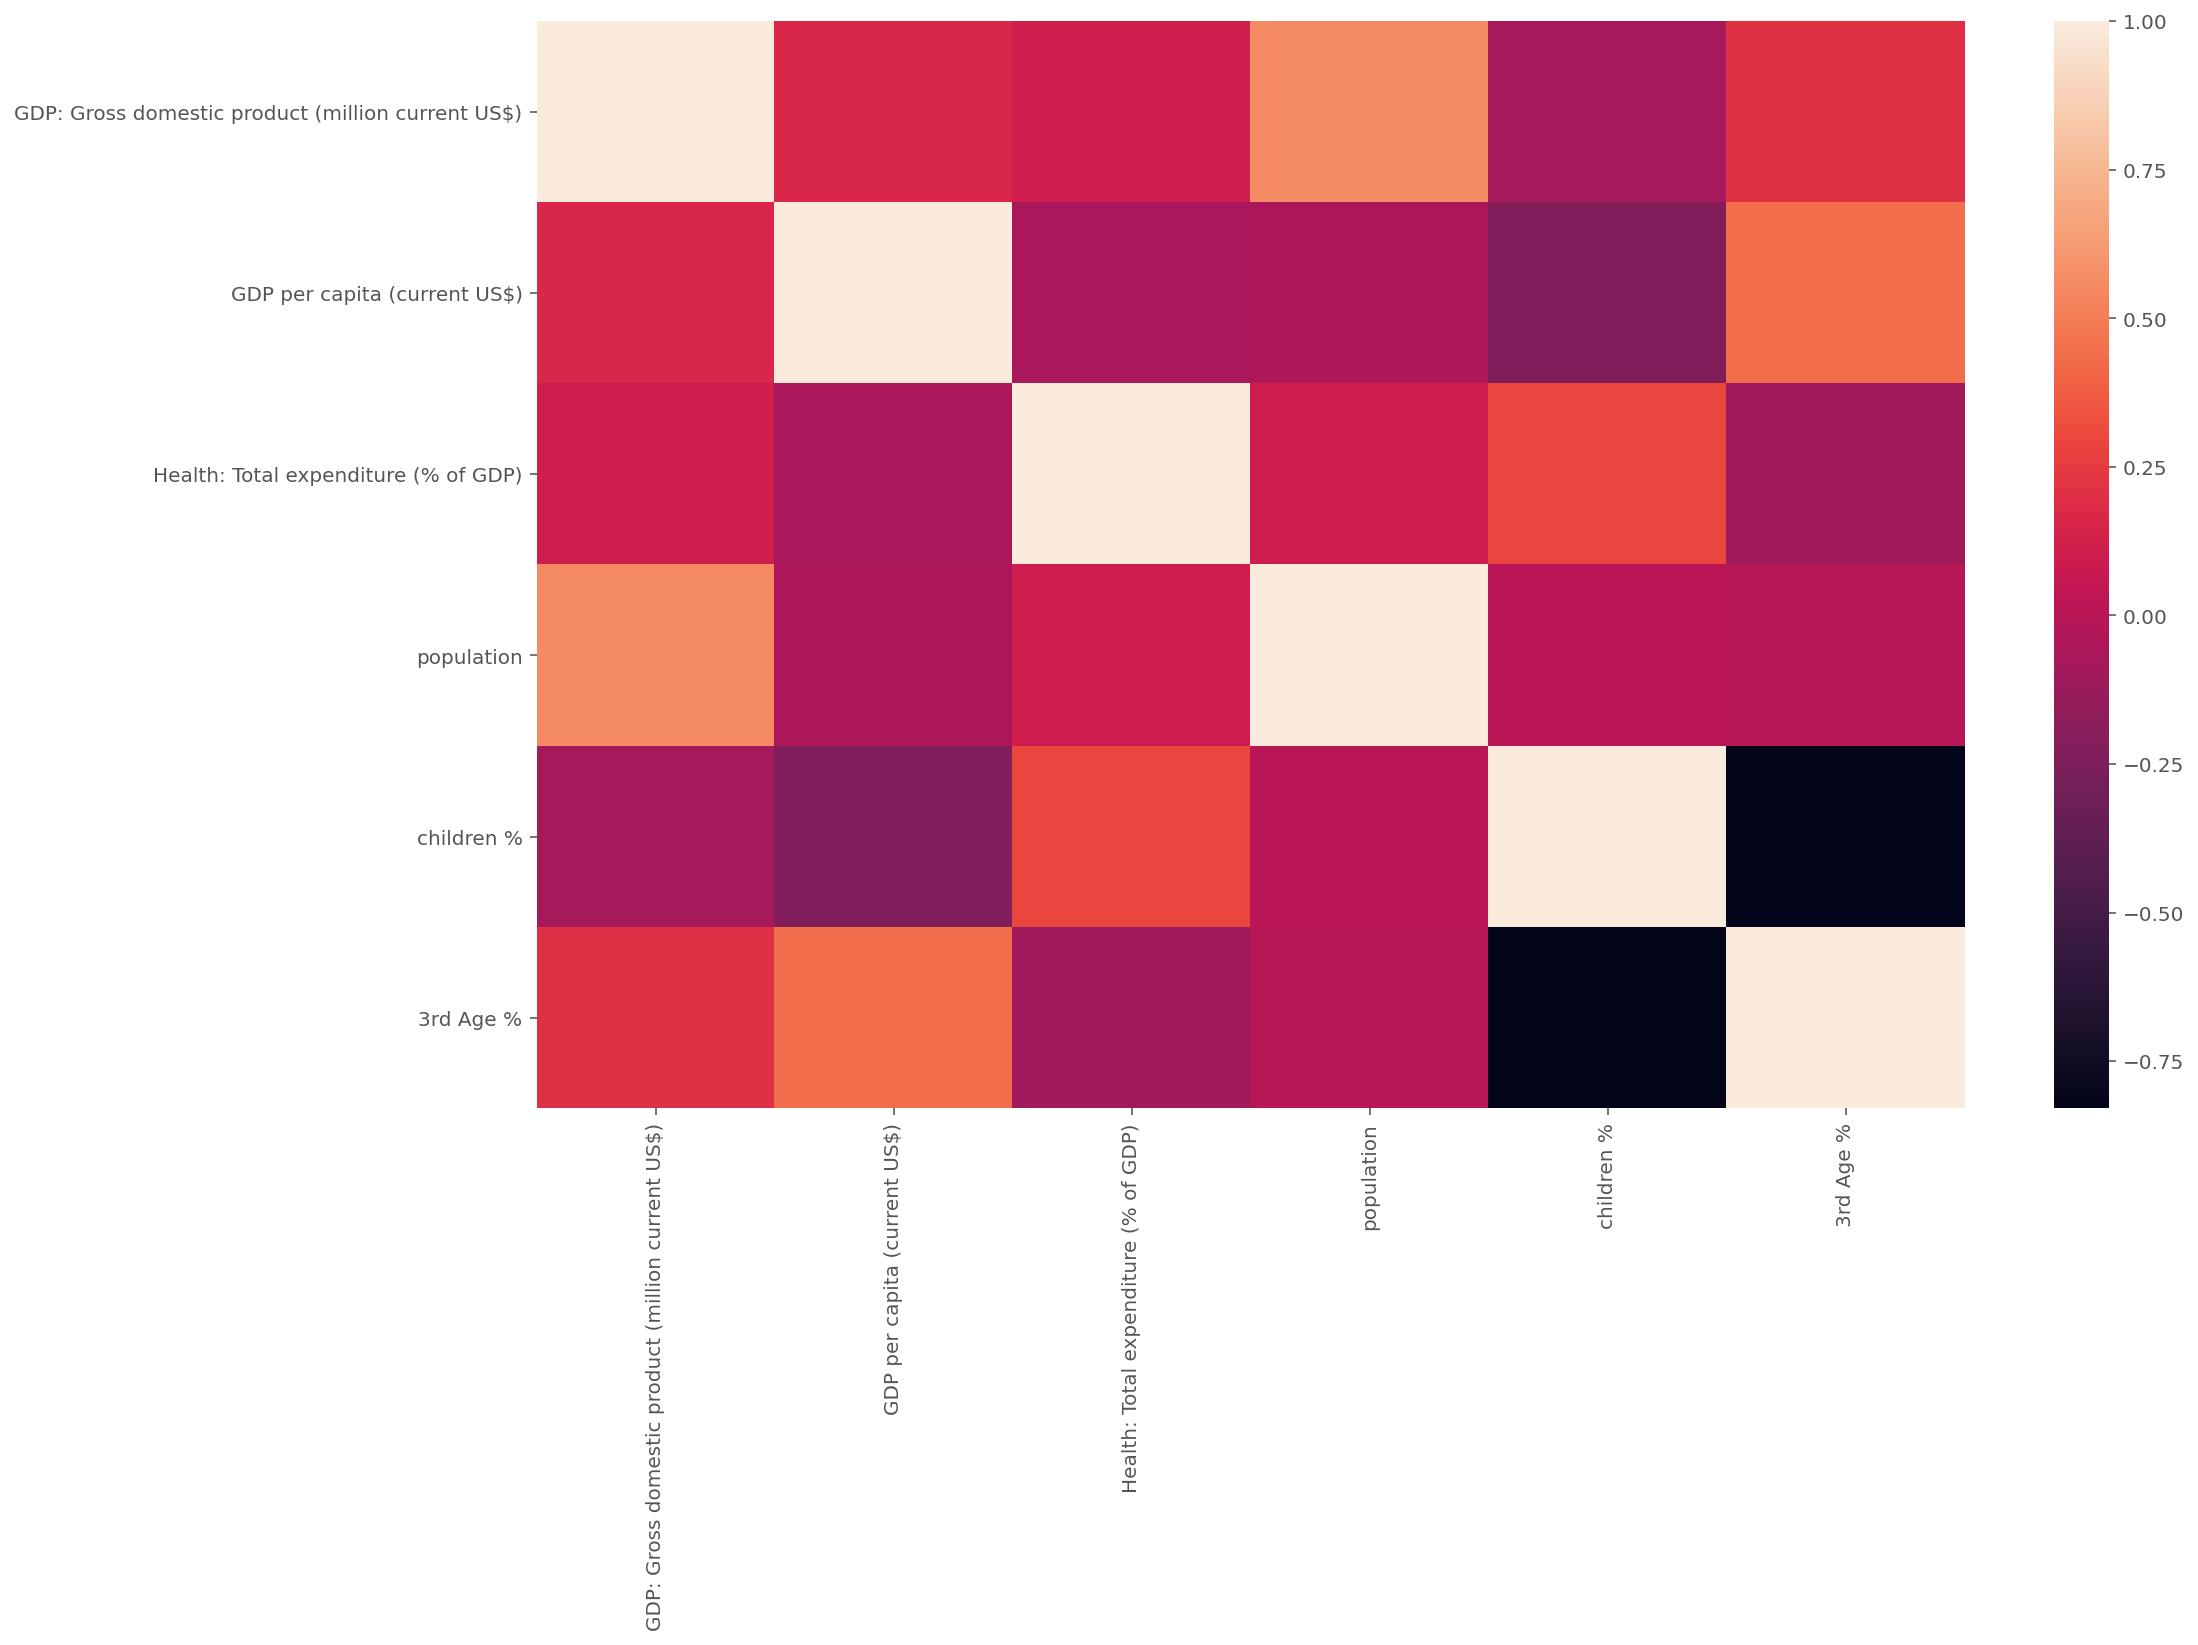

In [ ]:
sns.heatmap(df_clust.corr())

In [ ]:
outlier_cols = ["children %", "Health: Total expenditure (% of GDP)"]
df_clust = df_clust[df_clust["children %"] != -0.99]
df_clust = df_clust[df_clust["Health: Total expenditure (% of GDP)"] != -99]
df_clust

,country,GDP: Gross domestic product (million current US$),GDP per capita (current US$),Health: Total expenditure (% of GDP),population,children %,3rd Age %
0,Afghanistan,20270,623.2,8.2,35530000,0.432,0.041
1,Albania,11541,3984.2,5.9,2930000,0.174,0.190
2,Algeria,164779,4154.1,7.2,41318000,0.293,0.094
4,Andorra,2812,39896.4,8.1,77000,0.144,0.190
5,Angola,117955,4714.1,3.3,29784000,0.468,0.040
...,...,...,...,...,...,...,...
222,United States,344331,11068.9,5.3,31977000,0.276,0.099
223,Venezuela,193241,2067.9,7.1,95541000,0.231,0.111
226,Yemen,29688,1106.4,5.6,28250000,0.399,0.046
227,Zambia,21255,1311.1,5.0,17094000,0.448,0.037


In [ ]:
cluster_data = df_clust.loc[:, df_clust.columns != "country"]

In [ ]:
#Check there are no null values for any Indicator
total = cluster_data.isnull().sum().sort_values(ascending=False)
percent_1 = cluster_data.isnull().sum()/cluster_data.isnull().count()*100
percent_2 = round(percent_1,1).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data[missing_data['Total']!=0]

,Total,%
3rd Age %,3,1.6
children %,3,1.6


In [ ]:
countries_missing = list(df_clust[df_clust['3rd Age %'].isnull()].country)

In [ ]:
df_clust = df_clust.fillna(df_clust.mean())

In [ ]:
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 228
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   country                                            190 non-null    object 
 1   GDP: Gross domestic product (million current US$)  190 non-null    int64  
 2   GDP per capita (current US$)                       190 non-null    float64
 3   Health: Total expenditure (% of GDP)               190 non-null    float64
 4   population                                         190 non-null    int64  
 5   children %                                         190 non-null    float32
 6   3rd Age %                                          190 non-null    float32
 7   cluster                                            190 non-null    float64
dtypes: float32(2), float64(3), int64(2), object(1)
memory usage: 11.9+ KB


In [ ]:
cluster_data = df_clust.loc[:, df_clust.columns != "country"]
#Check there are no null values for any Indicator
total = cluster_data.isnull().sum().sort_values(ascending=False)
percent_1 = cluster_data.isnull().sum()/cluster_data.isnull().count()*100
percent_2 = round(percent_1,1).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data[missing_data['Total']!=0]

,Total,%


Given the missing values are such a low proportion, we proceed to drop them:

Standardize data:

In [ ]:
mu = np.mean(cluster_data)
sigma = np.std(cluster_data)
cluster_data = (cluster_data - mu) / sigma

In [ ]:
k.fit(cluster_data)
predict = k.predict(cluster_data)

In [ ]:
df_clust["cluster"] = pd.Series(predict, index = cluster_data.index)
df_clust.head()

,country,GDP: Gross domestic product (million current US$),GDP per capita (current US$),Health: Total expenditure (% of GDP),population,children %,3rd Age %,cluster
0,Afghanistan,20270,623.2,8.2,35530000,0.432,0.041,1
1,Albania,11541,3984.2,5.9,2930000,0.174,0.190,0
2,Algeria,164779,4154.1,7.2,41318000,0.293,0.094,1
4,Andorra,2812,39896.4,8.1,77000,0.144,0.190,4
5,Angola,117955,4714.1,3.3,29784000,0.468,0.040,1


In [ ]:
df_clust.shape

(190, 8)

In [ ]:
k.cluster_centers_

array([[-0.11773362, -0.12245391,  0.34359167, -0.13470492, -0.91500769,
         0.89982   ,  0.88822615],
       [-0.18631591, -0.40987811, -0.35665626, -0.09594862,  0.65215159,
        -0.69807881, -0.79224982],
       [ 3.87789126, -0.41655711, -0.59597632,  9.19838385, -0.48963838,
         0.05690879,  0.04078589],
       [10.94761013,  2.07410439,  3.70410601,  1.96555015, -0.86387788,
         1.17105765,  2.58310667],
       [ 0.32202683,  2.03152215,  0.8101506 , -0.11523303, -1.01790055,
         1.27635424,  1.66623975]])

In [ ]:
#sns.lmplot(x = 'GDP per capita (current US$)', y = 'Health: Total expenditure (% of GDP)', hue = "cluster", data = df_clust)

In [ ]:
print("Shape of CovidData" + str(CovidData.shape))
print("Shape of ExtraData" + str(ExtraData2.shape))

Shape of CovidData(8623, 15)
Shape of ExtraData(229, 50)


In [ ]:
ExtraData2 = df_clust

In [ ]:
ExtraData2.shape

(190, 8)

The datasets are not merged and CovidData dataframe is not grouped by weeks/months.

# PREDICTION

In [ ]:
#Functions which takes the name of the countries
def get_countries(df,column_name):
    return df[column_name].unique()

In [ ]:
countries = get_countries(CovidData,"country")

In [ ]:
#column names to use from ExtraData2
col_names = ["Population in thousands (2017)", "GDP per capita (current US$)", "Health: Total expenditure (% of GDP)"]

In [ ]:

y = []
for country in countries:
    y.append(CovidData[CovidData['country']==country]["daily_vaccinations"].sum())

In [ ]:
print(y[:10])

[49509.0, 118314.0, 69070.0, 8021.0, 107497.0, 5617.0, 28738.0, 3927443.0, 647950.0, 1625555.0]


In [ ]:
y = np.array(y)
#y = np.nan_to_num(y)
y.shape

(149,)

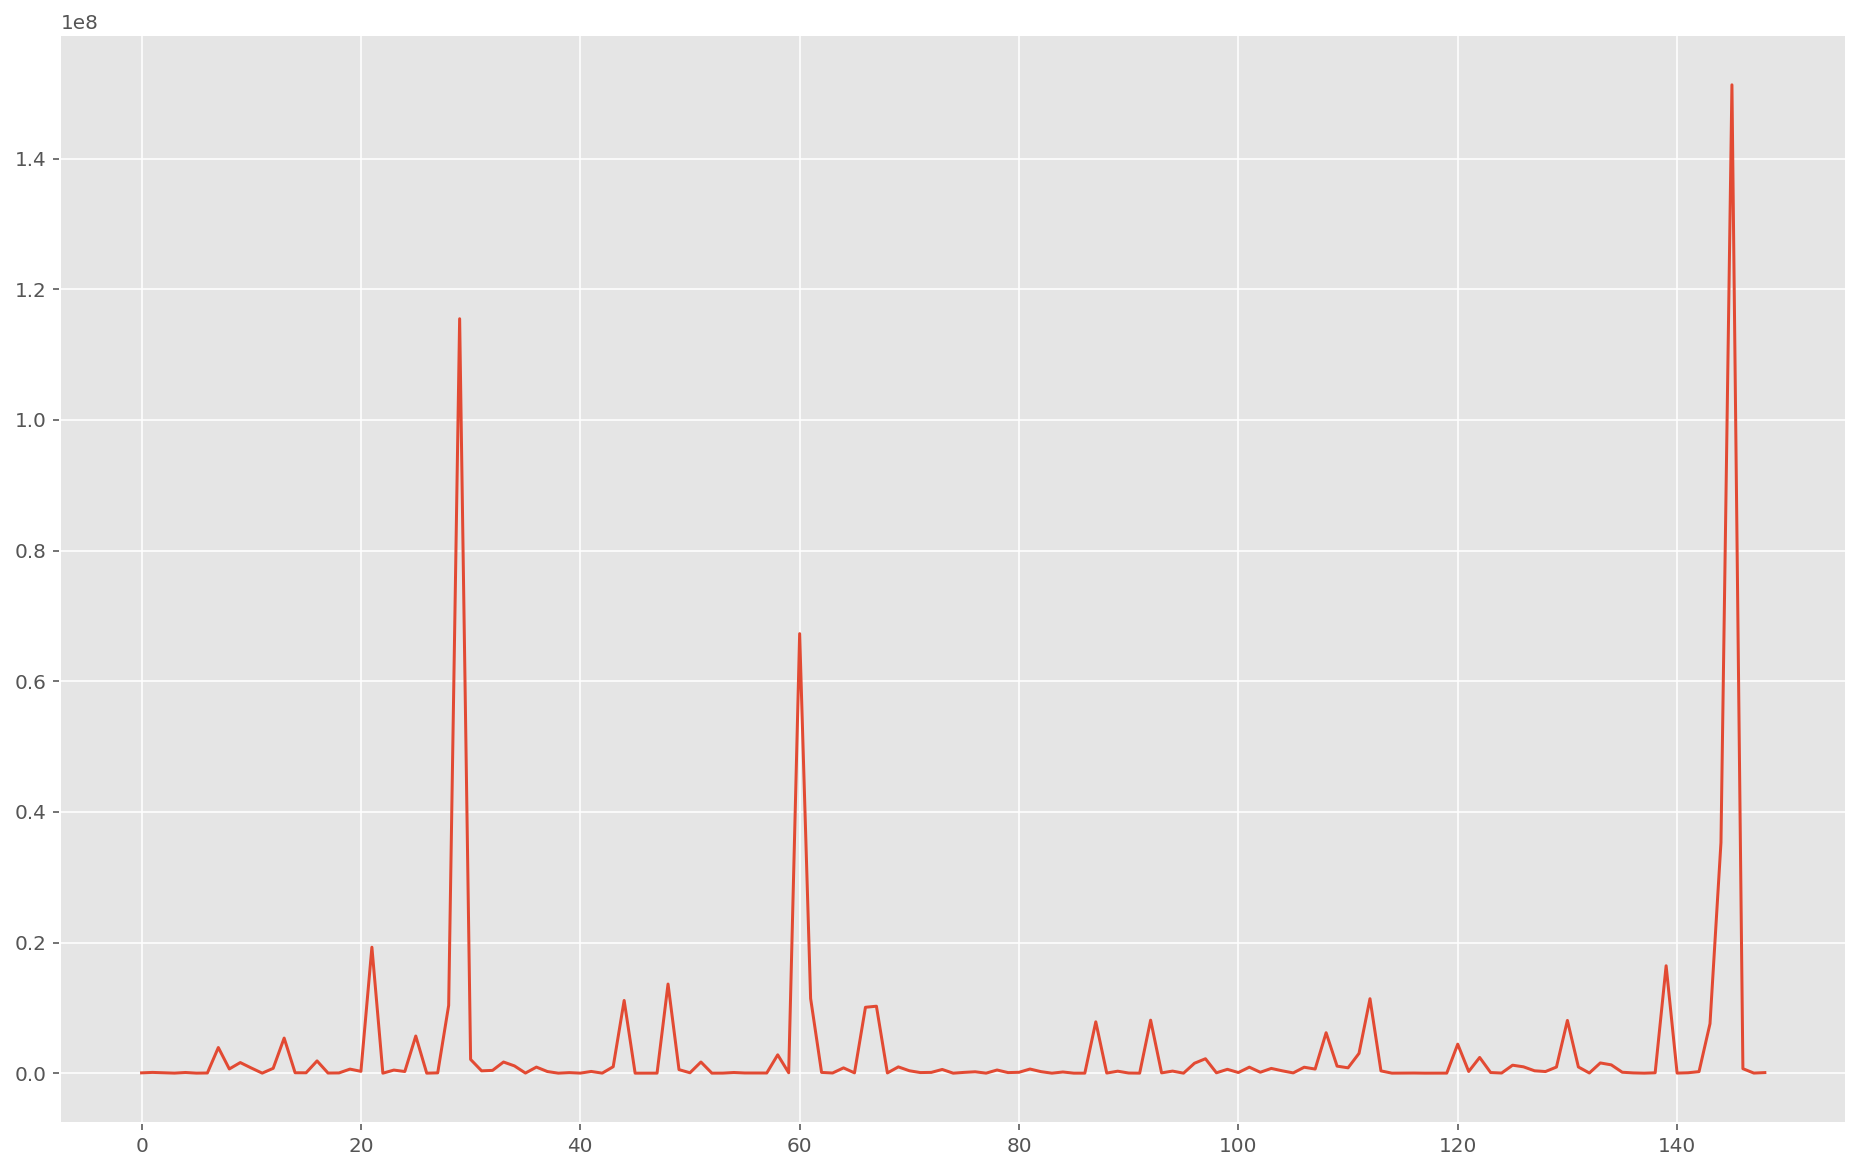

In [ ]:
plt.plot(range(len(y)), y)

In [ ]:
X = ExtraData2[ExtraData2.country.isin(countries)][col_names].values
X = np.nan_to_num(X)

In [ ]:
X.shape

(149, 3)

In [ ]:
#Standarize data
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

In [ ]:
# standardize prediction
y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std
print(y.shape)

(149,)


In [ ]:
train_perc = 0.8 # percentage of training data
split_point = int(train_perc*len(y))
perm = np.random.permutation(len(y))
ix_train = perm[:split_point]
ix_test = perm[split_point:]
X_train = X[ix_train,:]
X_test = X[ix_test,:]
y_train = y[ix_train]
y_test = y[ix_test]
print("num train: %d" % len(y_train))
print("num test: %d" % len(y_test))

num train: 119
num test: 30


In [ ]:
def compute_error(trues, predicted):
    corr = np.corrcoef(predicted, trues)[0,1]
    mae = np.mean(np.abs(predicted - trues))
    rae = np.sum(np.abs(predicted - trues)) / np.sum(np.abs(trues - np.mean(trues)))
    rmse = np.sqrt(np.mean((predicted - trues)**2))
    r2 = max(0, 1 - np.sum((trues-predicted)**2) / np.sum((trues - np.mean(trues))**2))
    return corr, mae, rae, rmse, r2

In [ ]:
#regr = linear_model.LinearRegression()
regr = linear_model.Ridge()
regr.fit(X_train, y_train)
y_hat = regr.predict(X_test)

# convert back to the original scale
preds = y_hat * y_std + y_mean
y_true = y_test * y_std + y_mean

corr, mae, rae, rmse, r2 = compute_error(y_true, preds)
print("CorrCoef: %.3f\nMAE: %.3f\nRMSE: %.3f\nR2: %.3f" % (corr, mae, rmse, r2))

CorrCoef: 0.272
MAE: 4061205.744
RMSE: 4971041.096
R2: 0.000


In [ ]:
# define Stan model
model_definition = """
data {
    int<lower=0> N; // number of data items
    int<lower=0> D; // number of predictors
    matrix[N,D] x;  // predictor matrix
    vector[N] y;    // outcome vector
}
parameters {
    real alpha;             // intercept
    vector[D] beta;         // coefficients for predictors
    real<lower=0> sigma;    // error scale
} 
model {
    alpha ~ normal(0,10);                        // prior on the intercept
    sigma ~ cauchy(0,10);                        // prior on the variance
    for (d in 1:D)
        beta[d] ~ normal(0,1);             // prior on the coefficients
    y ~ normal(alpha + x * beta, sigma);   // likelihood
}
"""

In [ ]:
N, D = X_train.shape
data = {'N': N, 'D': D, 'x': X_train, 'y': y_train}

In [ ]:
%%time
# create Stan model object
sm = pystan.StanModel(model_code=model_definition)
fit = sm.sampling(data=data, iter=1000, chains=4, algorithm="NUTS", seed=42, verbose=True)
print(fit)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b1511d20bf91ff9ca54ff2adc5ccd233 NOW.


KeyboardInterrupt: ignored

In [ ]:
pl = fit.plot();

In [ ]:
samples = fit.extract(permuted=True)  # return a dictionary of arrays
print(samples["alpha"].shape)
print(samples["beta"].shape)

In [ ]:
y_hat = np.mean(samples["alpha"].T + np.dot(X_test, samples["beta"].T), axis=1)

In [ ]:
# convert back to the original scale
preds = y_hat * y_std + y_mean
y_true = y_test * y_std + y_mean

corr, mae, rae, rmse, r2 = compute_error(y_true, preds)
print("CorrCoef: %.3f\nMAE: %.3f\nRMSE: %.3f\nR2: %.3f" % (corr, mae, rmse, r2))